## ESERCIZIO 9
in questo esercizio abbiamo risolto il problema del commesso viaggiatore tramite l'uso di un algoritmo genetico.
gli algoritmi genetici prendono ad esempio l'evoluzione naturale per trovare una buona soluzione ad un problema migliorando i dati ad ogni nuova generazione.
attenzione: non sempre la soluzione trovata tramite gli algoritmi genetici è la migliore ma questi algoritmi permettono comunque di trovare una buona soluzione.
il problema del commesso viaggiatore consiste nel trovare il cammino più corto tra un determinato numero di punti nel piano.

ho creato l'algoritmo genetico tramite la programmazione in classi, creando quindi la classe $GA$:
- come prima cosa ho inizializzato il sistema tramite il costruttore $GA(int Nc, int Np)$ definendo il numero di punti nel piano ($Nc=32$) e il numero di componenti della popolazione ($Np=900$)


- ho poi creato la configurazione dei punti nel piano tramite il metodo $GenerateCities(int mode)$.
    - selezionando mode=0: vengono generati $Nc$ punti randomici vincolati su una circonferenza di raggio 1 e centro nell'origine
    - selezionando mode=1: vengono generati $Nc$ punti randomici all'interno di un quadrato di lato 1 e centro nell'origine


- il passo successivo è stato creare la prima generazione composta da $Np$ componenti, per farlo ho implementato il metodo $Generate Population()$. questo metodo crea una popolazione di $Np$ elementi che sono permutazioni casuali dei punti precedentemente generati, tenendo però il primo punto (che è anche l'ultimo) fisso. è necessario tenere il punto di partenza (e quindi anche di arrivo) fisso in quanto riduce la degenerazione da 2Nc a solo 2. in pratica ogni componente della popolazione rappresenta un possibile cammino.


- in seguito ho valutato la bontà di ogni cammino presente nella popolazione tramite i metodi $Distanze()$ e $Order()$. (il criterio di bontà coincide con la lunghezza del cammino, più un cammino è corto più è buono)
    - il metodo $Distanze()$: calcola la lunghezza di ogni cammino presente nella popolazione
    - il metodo $Order()$: crea un vettore che restituisce una classifica di bontà di ogni cammino della popolazione, (in pratica non ho spostato nessun elemento ma gli ho assegnato un numero che corrisponde alla sua "posizione in classifica" di bontà). ho deciso di usare questo tipo di ordinamento perchè computazionalmente meno oneroso che riordinare la popolazione dal cammino più corto a quello più lungo.


- si arriva poi alla parte consistente del codice, ossia quella che permette di generare una nuova generazione a partire dalla precedente. il metodo che permette ciò è $Crossover()$ che si serve del metodo $Selection()$
    - il metodo $Selection()$: restituisce un intero compreso tra $[0,Np]$ con densità di probabilità maggiore sui numeri bassi. per fare ciò ho seguito il consiglio fornito ($Np*(random[0,1])^2$). questo intero corrisponderà al numero in classifica di bontà.
    - il metodo $Crossover()$: seleziona 2 cammini buoni (cammino madre e cammino padre) tramite il metodo $Selection()$ e
        - nel 50% dei casi copia i due cammini, senza alcuma modifica, nella nuova generazione
        - nel restante 50% dei casi crea due nuovi cammini derivati dai cammini padre e madre e li mette nella nuova generazione. i due nuovi cammini vengono creati con il metodo suggerito ossia:
            - i cammini padre e madre vengono tagliati allo stesso punto
            - la prima parte del nuovo cammino è ottenuto copiando la prima parte del cammino madre
            - la restante parte del nuovo cammino viene completata mantenendo l'ordine degli elementi del cammino padre 
            - analogamente si crea il secondo nuovo cammino (scambiando il ruolo del cammino padre e del cammino madre)


- una volta creata la nuova generazione ho introdotto delle mutazioni nei percorsi tramite il metodo $Mutation(int mode)$ lasciando però la posizione della prima città sempre inalterata
    - con mode=0: si scambia la posizione di due città in modo randomico. questa mutazione avviene con una probabilità del 10%
    - con mode=1: si fanno shiftare delle città vicine di un numero randomico di posizioni. questa mutazione avviene con una probabilità del 5%
    - con mode=2: si scambiano le posizioni di un numero randomico di città adiacenti. quetsa mutazione avviene con una probabilità del 5%
    - con mode=3: si inverte l'ordine di posizioni di un numero randomico di città adiacenti. questa mutazione avviene con una probabilità del 10%


quindi l'iter per creare nuove generazioni consiste in:
- calcolare le distanze dei cammini delle popolazione con $Distanze()$
- valutare la bontà dei cammini della popolazione con $Order()$
- creare la nuova generazione con $Crossover()$
- applicare le mutazioni alla nuova generazione, ciclando su tutti i mode di $Mutation(int mode)$

in questo modo ho creato $1000$ generazioni per le due configurazioni di punti nel piano. 
sotto sono presenti i grafici che rappresentano l'andamento della lunghezza del cammino più buono di ogni generazione e l'andamento della media delle lunghezze della metà migliore dei cammini più buoni nelle generazioni.
inoltre ho fatto un grafico in cui sono rappresentati i cammini migliori.

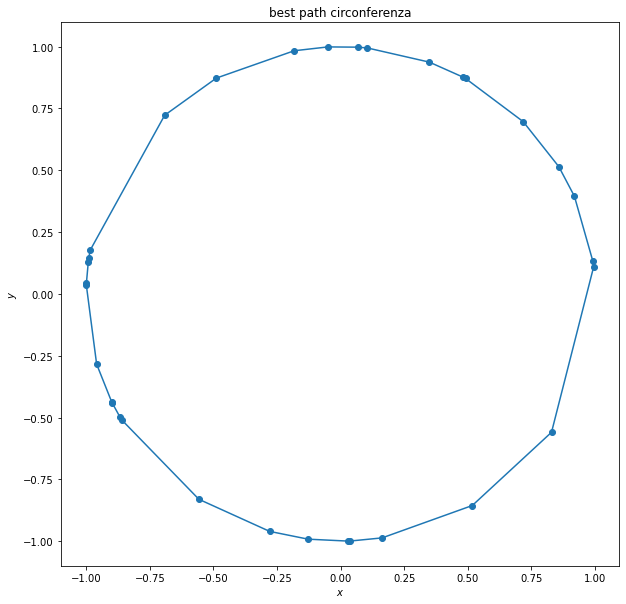

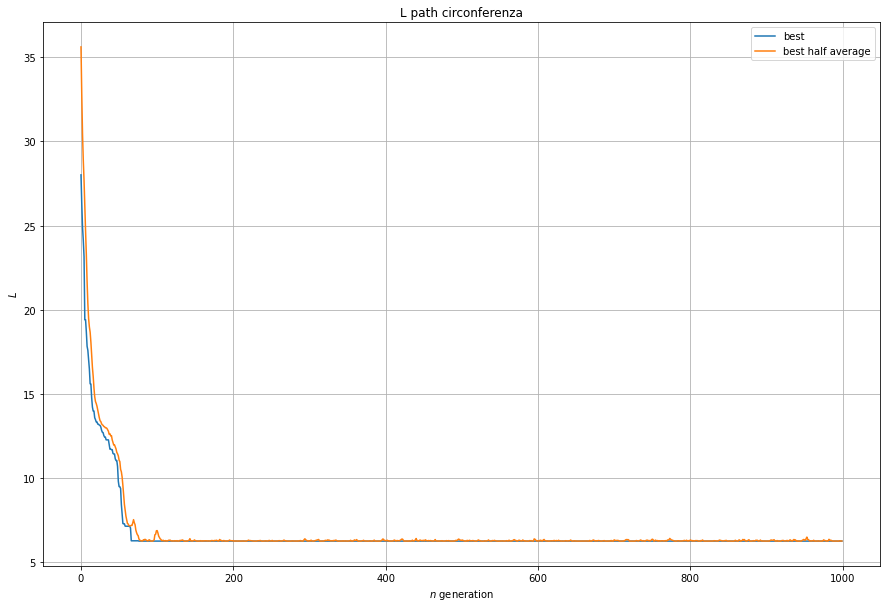

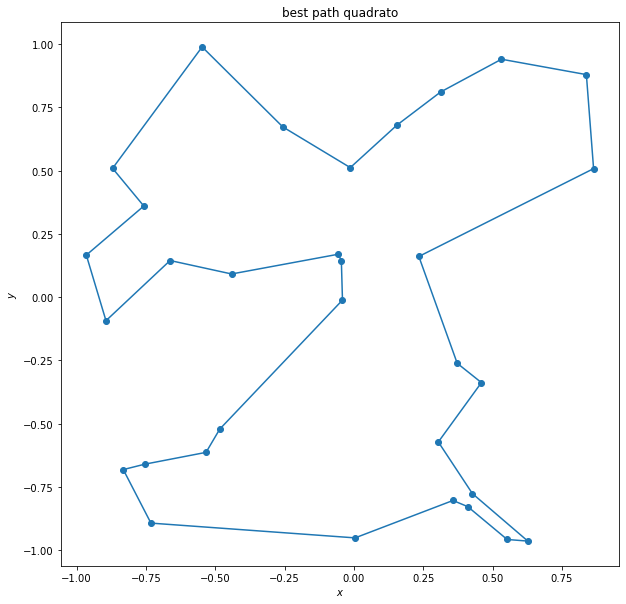

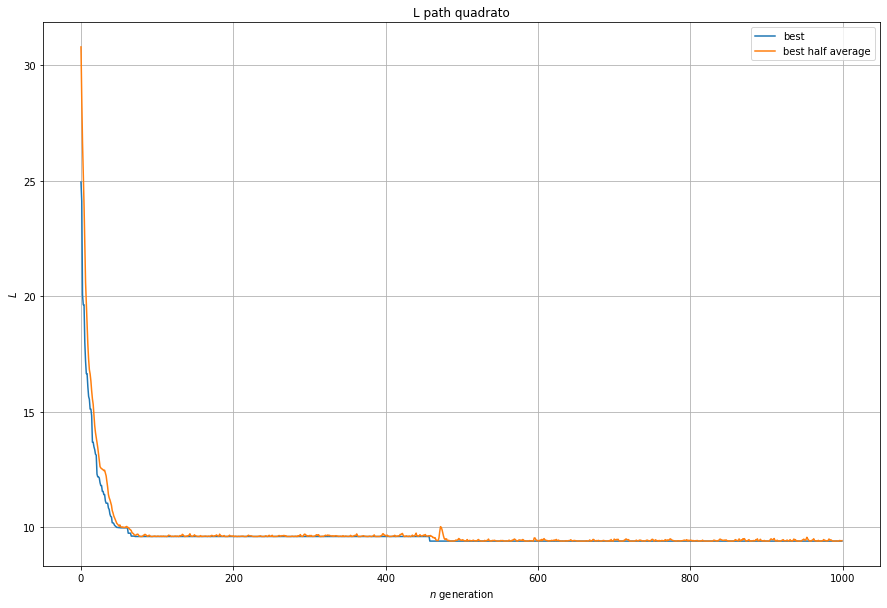

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#CIRCONFERENZA
xy = np.loadtxt("city_1", delimiter=" " , usecols=(0,1))
bestp=np.loadtxt("best_1", dtype=int)
Lbest=np.loadtxt("L_best_1")
Lave=np.loadtxt("L_ave_1")

x=xy[:,0]
y=xy[:,1]
xb=np.zeros(len(bestp))
yb=np.zeros(len(bestp))
for i in range(len(bestp)):
    xb[i]=x[bestp[i]]
    yb[i]=y[bestp[i]] 
    
fig,g=plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(x,y)
plt.plot(xb,yb)
plt.xlabel('$x$')
plt.ylabel("$y$")
plt.title("best path circonferenza")
plt.show()

ngen=np.arange(0, len(Lbest),1)
fig,g=plt.subplots(1, 1, figsize=(15, 10))
plt.plot(ngen,Lbest, label="best")
plt.plot(ngen, Lave, label="best half average")
plt.xlabel('$n$ generation')
plt.ylabel("$L$")
plt.title("L path circonferenza")
plt.legend()
plt.grid(True)
plt.show()

#RETTANGOLO
xy = np.loadtxt("city_2", delimiter=" " , usecols=(0,1))
bestp=np.loadtxt("best_2", dtype=int)
Lbest=np.loadtxt("L_best_2")
Lave=np.loadtxt("L_ave_2")

x=xy[:,0]
y=xy[:,1]
xb=np.zeros(len(bestp))
yb=np.zeros(len(bestp))
for i in range(len(bestp)):
    xb[i]=x[bestp[i]]
    yb[i]=y[bestp[i]] 
    
fig,g=plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(x,y)
plt.plot(xb,yb)
plt.xlabel('$x$')
plt.ylabel("$y$")
plt.title("best path quadrato")
plt.show()

ngen=np.arange(0, len(Lbest),1)
fig,g=plt.subplots(1, 1, figsize=(15, 10))
plt.plot(ngen,Lbest, label="best")
plt.plot(ngen, Lave, label="best half average")
plt.xlabel('$n$ generation')
plt.ylabel("$L$")
plt.title("L path quadrato")
plt.legend()
plt.grid(True)
plt.show()

